In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

#### Read and pre-process data

In [2]:
# fetch data 

football_data = pd.read_excel('Kaggle_Data/CFB2019_subset_inclass.xlsx')

football_data.head()

,Conference,Games,Off Rank,Off TDs,Off Yards per Game,Penalty Yards Per Game,Avg Yards Per Punt Return,Yards/Rush,Rushing Yards per Game,Touchdowns,Points Per Game,3rd Percent,Average Time of Possession per Game
0,Mountain West,13,51,55,421.80,28.31,1.20,5.14,298.50,58,34.10,0.54,1900-01-01 10:28:00
1,MAC,12,130,14,243.20,52.17,3.83,1.75,47.60,15,10.50,0.26,1900-01-01 02:29:00
2,SEC,13,6,76,510.80,65.77,24.14,5.03,168.50,83,47.20,0.52,1900-01-01 05:59:00
3,Sun Belt,14,39,65,433.10,64.21,9.57,5.41,231.40,73,38.80,0.45,1900-01-01 07:19:00
4,Pac-12,12,30,42,440.10,56.42,6.36,4.63,174.00,42,26.90,0.44,1900-01-01 03:24:00


In [3]:
# subset data to only include columns for Normal Sale Condition

len(football_data)

128

In [4]:
football_data.isna().sum()

Conference                             0
Games                                  0
Off Rank                               0
Off TDs                                0
Off Yards per Game                     0
Penalty Yards Per Game                 0
Avg Yards Per Punt Return              0
Yards/Rush                             0
Rushing Yards per Game                 0
Touchdowns                             0
Points Per Game                        0
3rd Percent                            0
Average Time of Possession per Game    0
dtype: int64

In [5]:
football_data.columns

Index(['Conference', 'Games', 'Off Rank', 'Off TDs', 'Off Yards per Game',
       'Penalty Yards Per Game', 'Avg Yards Per Punt Return', 'Yards/Rush',
       'Rushing Yards per Game', 'Touchdowns', 'Points Per Game',
       '3rd Percent', 'Average Time of Possession per Game'],
      dtype='object')

In [6]:
subset_data = football_data[['Games', 'Off Rank', 'Off TDs', 'Off Yards per Game',
       'Penalty Yards Per Game', 'Avg Yards Per Punt Return', 'Yards/Rush',
       'Rushing Yards per Game', 'Touchdowns', 'Points Per Game',
       '3rd Percent']].reset_index()
subset_data['Off TDs per game'] = subset_data['Off TDs']/subset_data['Games']
subset_data['Touchdowns per game'] = subset_data['Touchdowns']/subset_data['Games']
subset_data.head()

,index,Games,Off Rank,Off TDs,Off Yards per Game,Penalty Yards Per Game,Avg Yards Per Punt Return,Yards/Rush,Rushing Yards per Game,Touchdowns,Points Per Game,3rd Percent,Off TDs per game,Touchdowns per game
0,0,13,51,55,421.80,28.31,1.20,5.14,298.50,58,34.10,0.54,4.23,4.46
1,1,12,130,14,243.20,52.17,3.83,1.75,47.60,15,10.50,0.26,1.17,1.25
2,2,13,6,76,510.80,65.77,24.14,5.03,168.50,83,47.20,0.52,5.85,6.38
3,3,14,39,65,433.10,64.21,9.57,5.41,231.40,73,38.80,0.45,4.64,5.21
4,4,12,30,42,440.10,56.42,6.36,4.63,174.00,42,26.90,0.44,3.50,3.50


In [7]:
subset_data.drop(columns = ['index', 'Games', 'Off TDs', 'Touchdowns'], inplace = True)
subset_data.head()

,Off Rank,Off Yards per Game,Penalty Yards Per Game,Avg Yards Per Punt Return,Yards/Rush,Rushing Yards per Game,Points Per Game,3rd Percent,Off TDs per game,Touchdowns per game
0,51,421.80,28.31,1.20,5.14,298.50,34.10,0.54,4.23,4.46
1,130,243.20,52.17,3.83,1.75,47.60,10.50,0.26,1.17,1.25
2,6,510.80,65.77,24.14,5.03,168.50,47.20,0.52,5.85,6.38
3,39,433.10,64.21,9.57,5.41,231.40,38.80,0.45,4.64,5.21
4,30,440.10,56.42,6.36,4.63,174.00,26.90,0.44,3.50,3.50


In [8]:
subset_data.columns

Index(['Off Rank', 'Off Yards per Game', 'Penalty Yards Per Game',
       'Avg Yards Per Punt Return', 'Yards/Rush', 'Rushing Yards per Game',
       'Points Per Game', '3rd Percent', 'Off TDs per game',
       'Touchdowns per game'],
      dtype='object')

Text(0.5, 0, 'Off Yards per Game')

Text(0, 0.5, 'Off Rank')

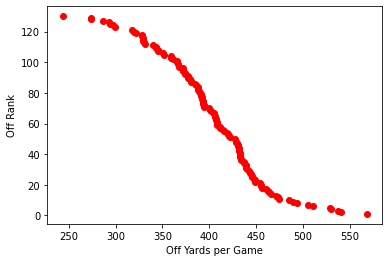

Text(0.5, 0, 'Penalty Yards Per Game')

Text(0, 0.5, 'Off Rank')

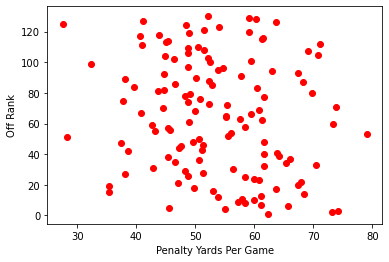

Text(0.5, 0, 'Avg Yards Per Punt Return')

Text(0, 0.5, 'Off Rank')

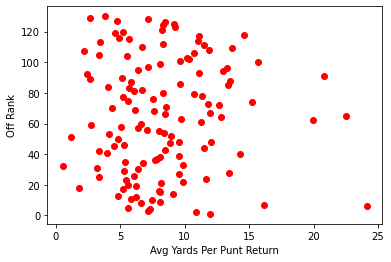

Text(0.5, 0, 'Yards/Rush')

Text(0, 0.5, 'Off Rank')

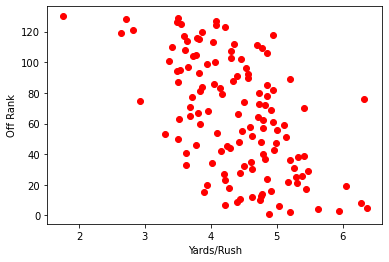

Text(0.5, 0, 'Rushing Yards per Game')

Text(0, 0.5, 'Off Rank')

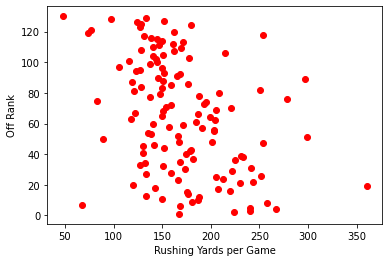

Text(0.5, 0, 'Points Per Game')

Text(0, 0.5, 'Off Rank')

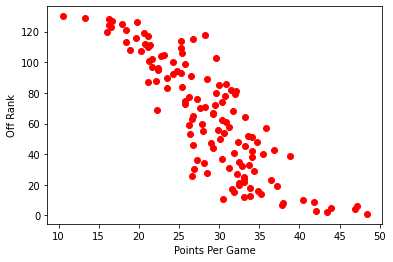

Text(0.5, 0, '3rd Percent')

Text(0, 0.5, 'Off Rank')

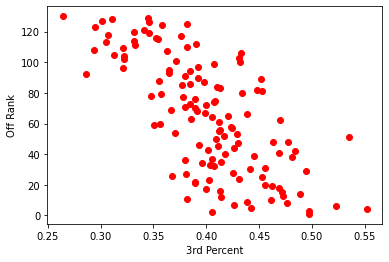

Text(0.5, 0, 'Off TDs per game')

Text(0, 0.5, 'Off Rank')

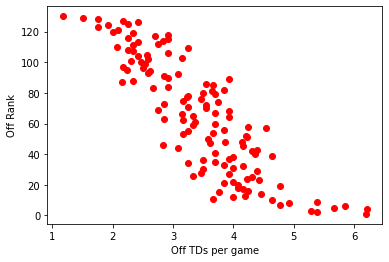

Text(0.5, 0, 'Touchdowns per game')

Text(0, 0.5, 'Off Rank')

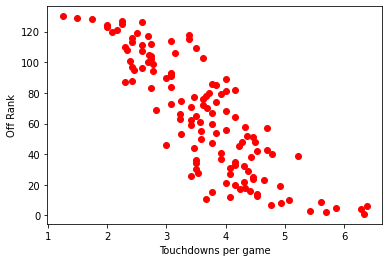

In [9]:
# plot the features against the response variable
col_set = ['Off Yards per Game', 'Penalty Yards Per Game',
       'Avg Yards Per Punt Return', 'Yards/Rush', 'Rushing Yards per Game',
       'Points Per Game', '3rd Percent', 'Off TDs per game',
       'Touchdowns per game']
for col in col_set:
    plt.scatter(subset_data[col], subset_data['Off Rank'], color = 'red', marker = 'o')
    plt.xlabel(col)
    plt.ylabel('Off Rank')
    plt.show()

In [10]:
# adding non-linear columns
if True: 
    subset_data['OffYdpG_sq'] = subset_data['Off Yards per Game']**2
    subset_data['OffYdpG_cu'] = subset_data['Off Yards per Game']**3
    subset_data['PPG_sq'] = subset_data['Points Per Game']**2
    subset_data['PPG_cu'] = subset_data['Points Per Game']**3
    subset_data['OffTDpG_sq'] = subset_data['Off TDs per game']**2
    subset_data['OffTDpG_cu'] = subset_data['Off TDs per game']**3
    subset_data['TDpG_sq'] = subset_data['Touchdowns per game']**2
    subset_data['TDpG_cu'] = subset_data['Touchdowns per game']**3

In [11]:
# X_train, X_test, y_train, y_test = train_test_split(subset_data.drop(columns = ['Off Rank']), subset_data['Off Rank'], test_size=0.25)
X_train, X_test, y_train, y_test = train_test_split(subset_data.drop(columns = ['Off Rank']), subset_data['Off Rank'], test_size=0.25, random_state=35)
# Pick a random_state as below and keep using the same number (example 35) to repeat the same test and train data
# X_train, X_test, y_train, y_test = train_test_split(subset_data['bmi'], subset_data['charges'], test_size=0.25, random_state=35)
X_train
X_test
y_train
y_test

,Off Yards per Game,Penalty Yards Per Game,Avg Yards Per Punt Return,Yards/Rush,Rushing Yards per Game,Points Per Game,3rd Percent,Off TDs per game,Touchdowns per game,OffYdpG_sq,OffYdpG_cu,PPG_sq,PPG_cu,OffTDpG_sq,OffTDpG_cu,TDpG_sq,TDpG_cu
90,330.30,45.00,3.42,4.04,171.40,18.40,0.30,2.42,2.42,"109,098.09","36,035,099.13",338.56,"6,229.50",5.84,14.11,5.84,14.11
4,440.10,56.42,6.36,4.63,174.00,26.90,0.44,3.50,3.50,"193,688.01","85,242,093.20",723.61,"19,465.11",12.25,42.88,12.25,42.88
70,418.60,56.00,8.42,4.10,135.30,30.60,0.37,3.67,3.83,"175,225.96","73,349,586.86",936.36,"28,652.62",13.44,49.30,14.69,56.33
99,365.50,52.54,15.67,4.07,144.20,24.20,0.43,2.46,2.69,"133,590.25","48,827,236.38",585.64,"14,172.49",6.06,14.91,7.25,19.52
54,343.40,48.75,13.67,4.78,169.40,25.30,0.32,3.25,3.50,"117,923.56","40,494,950.50",640.09,"16,194.28",10.56,34.33,12.25,42.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,327.70,43.77,14.63,4.94,253.20,28.20,0.31,2.92,3.38,"107,387.29","35,190,814.93",795.24,"22,425.77",8.54,24.98,11.46,38.77
55,293.10,63.67,8.50,3.48,124.60,19.80,0.35,2.42,2.58,"85,907.61","25,179,520.49",392.04,"7,762.39",5.84,14.11,6.67,17.24
108,351.90,70.86,3.38,3.78,150.80,23.10,0.31,2.57,2.71,"123,833.61","43,577,047.36",533.61,"12,326.39",6.61,17.00,7.37,20.00
15,388.50,44.62,6.71,4.94,250.50,31.50,0.45,3.85,4.15,"150,932.25","58,637,179.12",992.25,"31,255.88",14.79,56.90,17.25,71.67


,Off Yards per Game,Penalty Yards Per Game,Avg Yards Per Punt Return,Yards/Rush,Rushing Yards per Game,Points Per Game,3rd Percent,Off TDs per game,Touchdowns per game,OffYdpG_sq,OffYdpG_cu,PPG_sq,PPG_cu,OffTDpG_sq,OffTDpG_cu,TDpG_sq,TDpG_cu
86,273.10,59.08,2.69,3.51,133.80,13.30,0.34,1.50,1.50,"74,583.61","20,368,783.89",176.89,"2,352.64",2.25,3.38,2.25,3.38
40,432.80,63.85,4.00,3.63,130.40,31.80,0.47,3.69,3.92,"187,315.84","81,070,295.55","1,011.24","32,157.43",13.63,50.34,15.39,60.38
51,447.30,60.00,11.69,4.86,212.80,33.10,0.43,4.23,4.46,"200,077.29","89,494,571.82","1,095.61","36,264.69",17.90,75.73,19.91,88.81
47,460.90,63.67,5.20,5.45,207.30,31.60,0.40,4.17,4.25,"212,428.81","97,908,438.53",998.56,"31,554.50",17.36,72.34,18.06,76.77
25,329.70,45.33,11.00,3.64,150.30,25.30,0.33,2.83,3.08,"108,702.09","35,839,079.07",640.09,"16,194.28",8.03,22.75,9.51,29.31
27,405.50,40.85,12.00,3.80,122.30,29.20,0.40,3.69,3.77,"164,430.25","66,676,466.38",852.64,"24,897.09",13.63,50.34,14.21,53.55
48,439.40,61.62,0.53,4.50,150.50,32.80,0.41,4.15,4.31,"193,072.36","84,835,994.98","1,075.84","35,287.55",17.25,71.67,18.56,79.93
53,393.80,52.31,11.81,4.73,193.40,25.80,0.39,2.85,3.08,"155,078.44","61,069,889.67",665.64,"17,173.51",8.10,23.06,9.47,29.13
95,367.90,48.75,7.15,3.66,105.50,21.70,0.39,2.17,2.42,"135,350.41","49,795,415.84",470.89,"10,218.31",4.69,10.17,5.84,14.11
106,449.30,67.92,9.88,5.17,243.20,33.10,0.39,4.00,4.31,"201,870.49","90,700,411.16","1,095.61","36,264.69",16.00,64.00,18.56,79.93


90     113
4       30
70      54
99     100
54     109
      ... 
33     118
55     126
108    105
15      82
73      43
Name: Off Rank, Length: 96, dtype: int64

86     129
40      41
51      24
47      17
25     114
27      67
48      32
53      73
95      97
106     22
38      78
12      48
13      47
121     79
17     117
103     11
37      13
14     120
31      60
87     110
22      74
10      16
127    106
75       4
84      75
92     112
49       8
24      34
126     38
81      58
50      35
115    116
Name: Off Rank, dtype: int64

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns)
X_train
X_test
y_train
y_test

,Off Yards per Game,Penalty Yards Per Game,Avg Yards Per Punt Return,Yards/Rush,Rushing Yards per Game,Points Per Game,3rd Percent,Off TDs per game,Touchdowns per game,OffYdpG_sq,OffYdpG_cu,PPG_sq,PPG_cu,OffTDpG_sq,OffTDpG_cu,TDpG_sq,TDpG_cu
0,-1.23,-0.81,-1.14,-0.45,0.04,-1.46,-1.71,-1.04,-1.19,-1.18,-1.10,-1.26,-1.05,-0.96,-0.84,-1.05,-0.89
1,0.63,0.29,-0.47,0.31,0.09,-0.26,0.76,0.08,-0.11,0.58,0.52,-0.36,-0.41,-0.06,-0.17,-0.23,-0.31
2,0.27,0.25,0.00,-0.37,-0.68,0.27,-0.53,0.25,0.22,0.20,0.13,0.15,0.03,0.11,-0.02,0.09,-0.04
3,-0.63,-0.08,1.66,-0.41,-0.50,-0.64,0.60,-1.00,-0.92,-0.67,-0.68,-0.68,-0.67,-0.93,-0.82,-0.87,-0.78
4,-1.01,-0.45,1.20,0.51,-0.00,-0.49,-1.42,-0.18,-0.11,-1.00,-0.96,-0.55,-0.57,-0.30,-0.37,-0.23,-0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,-1.27,-0.92,1.42,0.72,1.65,-0.07,-1.67,-0.52,-0.22,-1.22,-1.13,-0.19,-0.27,-0.58,-0.58,-0.33,-0.39
92,-1.86,0.98,0.02,-1.18,-0.89,-1.27,-0.96,-1.04,-1.03,-1.66,-1.46,-1.14,-0.97,-0.96,-0.84,-0.95,-0.83
93,-0.86,1.67,-1.15,-0.79,-0.37,-0.80,-1.56,-0.88,-0.89,-0.87,-0.86,-0.80,-0.75,-0.85,-0.77,-0.86,-0.77
94,-0.24,-0.84,-0.39,0.72,1.60,0.39,0.89,0.43,0.55,-0.31,-0.36,0.28,0.15,0.30,0.15,0.42,0.27


,Off Yards per Game,Penalty Yards Per Game,Avg Yards Per Punt Return,Yards/Rush,Rushing Yards per Game,Points Per Game,3rd Percent,Off TDs per game,Touchdowns per game,OffYdpG_sq,OffYdpG_cu,PPG_sq,PPG_cu,OffTDpG_sq,OffTDpG_cu,TDpG_sq,TDpG_cu
0,-2.20,0.54,-1.31,-1.14,-0.71,-2.19,-0.98,-1.99,-2.11,-1.90,-1.62,-1.64,-1.23,-1.46,-1.08,-1.52,-1.11
1,0.51,1.00,-1.01,-0.98,-0.77,0.44,1.27,0.27,0.31,0.45,0.38,0.32,0.20,0.13,0.00,0.18,0.04
2,0.76,0.63,0.75,0.61,0.86,0.62,0.58,0.83,0.85,0.72,0.66,0.52,0.39,0.73,0.59,0.76,0.62
3,0.99,0.98,-0.74,1.38,0.75,0.41,0.02,0.76,0.64,0.97,0.93,0.29,0.17,0.66,0.51,0.52,0.37
4,-1.24,-0.77,0.59,-0.97,-0.38,-0.49,-1.22,-0.61,-0.53,-1.19,-1.11,-0.55,-0.57,-0.65,-0.64,-0.58,-0.58
5,0.05,-1.20,0.82,-0.76,-0.93,0.07,-0.00,0.27,0.16,-0.03,-0.09,-0.05,-0.15,0.13,0.00,0.02,-0.09
6,0.62,0.79,-1.81,0.15,-0.38,0.58,0.14,0.75,0.70,0.57,0.50,0.47,0.35,0.64,0.49,0.58,0.44
7,-0.15,-0.11,0.78,0.44,0.47,-0.41,-0.26,-0.60,-0.53,-0.22,-0.28,-0.49,-0.52,-0.64,-0.63,-0.59,-0.59
8,-0.59,-0.45,-0.29,-0.94,-1.27,-1.00,-0.13,-1.30,-1.19,-0.63,-0.65,-0.95,-0.86,-1.12,-0.93,-1.05,-0.89
9,0.79,1.39,0.34,1.01,1.46,0.62,-0.18,0.59,0.70,0.75,0.70,0.52,0.39,0.47,0.32,0.58,0.44


90     113
4       30
70      54
99     100
54     109
      ... 
33     118
55     126
108    105
15      82
73      43
Name: Off Rank, Length: 96, dtype: int64

86     129
40      41
51      24
47      17
25     114
27      67
48      32
53      73
95      97
106     22
38      78
12      48
13      47
121     79
17     117
103     11
37      13
14     120
31      60
87     110
22      74
10      16
127    106
75       4
84      75
92     112
49       8
24      34
126     38
81      58
50      35
115    116
Name: Off Rank, dtype: int64

In [13]:
# model = LinearRegression(fit_intercept = True)
# model = Lasso(alpha = 0.1, fit_intercept = True)
# model = Lasso(alpha = 0.1, fit_intercept = True, max_iter=10000)
model = Ridge(alpha = 5.0, fit_intercept = True)
model.fit(X_train, y_train) 

# The following gives the R-square score
model.score(X_train, y_train) 

# This is the coefficient Beta_1, ..., Beta_7
model.coef_

# This is the coefficient Beta_0
model.intercept_

Ridge(alpha=5.0)

0.9372081628280808

array([-13.40046582,   0.37766203,   1.48432119,   1.47558999,
        -0.38929115,  -0.64867299,  -2.32729042,  -6.027584  ,
        -3.16624926, -12.0203346 ,  -8.13747303,   0.18436897,
         4.66879847,  -2.38131947,   5.13572755,  -1.42299948,
         3.68218737])

65.82291666666667

In [14]:
test_output = pd.DataFrame(model.predict(X_test), index = X_test.index, columns = ['pred_Off Rank'])
# When extending to multiple features remove .array.reshape(-1, 1)
test_output.head()

,pred_Off Rank
0,140.49
1,42.90
2,38.59
3,29.89
4,107.77


In [15]:
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_Off Rank'] - test_output['Off Rank']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)

,pred_Off Rank,Off Rank
10,76.98,16
12,47.96,48
13,74.14,47
14,106.89,120
17,117.06,117


Mean absolute error is 
23.377880110032358


In [16]:
abs(test_output['pred_Off Rank'] - test_output['Off Rank']).mean()/test_output['Off Rank'].mean()

0.3354071751798043

In [17]:
model.score(X_test, y_test)

0.9532975758547193

#### Visualize data

In [18]:
# define function to import viz libraries
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns

In [19]:
cols = X_train.columns
for col in cols:
    plot_data = []
    plot_data.append(go.Scatter(x= X_train[col], y= y_train, name = 'Train data actual', mode = 'markers'))
    plot_data.append(go.Scatter(x= X_train[col], y= model.predict(X_train), name = 'Train data predicted', mode = 'markers'))
    layout = go.Layout(xaxis = dict(title=col), yaxis = dict(title= 'Off Rank'), 
                       title = 'Plot of predicted and actual')
    fig = go.Figure(data= plot_data, layout=layout)
    plotly.offline.iplot(fig)
    
    plot_data = []
    plot_data.append(go.Scatter(x= X_test[col], y= y_test, name = 'Test data actual', mode = 'markers'))
    plot_data.append(go.Scatter(x= X_test[col], y= model.predict(X_test), name = 'Test data predicted', mode = 'markers'))

    layout = go.Layout(xaxis = dict(title=col), yaxis = dict(title= 'Off Rank'), 
                       title = 'Plot of predicted and actual')
    fig = go.Figure(data= plot_data, layout=layout)
    plotly.offline.iplot(fig)


In [20]:
# Notes
# Linear model, no regularization
# test score 0.94, pct error error 35.93%
# Nonlinear model with sq and cubes, no regularization
# test score 0.99, pct error error 38.83%
# Linear model, Lasso alpha = 0.1
# test score 0.943, pct error error 34.48%
# Linear model, Lasso alpha = 10.0
# test score 0.838, pct error error 34.87%
# Linear model, Ridge alpha = 0.1
# test score 0.94, pct error error 35.73%
# Linear model, Ridge alpha = 10.0
# test score 0.91, pct error error 33.55%
# NonLinear model, Lasso alpha = 0.1
# test score 0.966, pct error error 34.7% (user max_iter = 10000)
# NonLinear model, Lasso alpha = 10.0
# test score 0.838, pct error error 34.87% (same, only features used is 1st)
# NonLinear model, Ridge alpha = 0.1
# test score 0.972, pct error error 35.9%
# NonLinear model, Ridge alpha = 10.0
# test score 0.943, pct error error 33.68%
# NonLinear model, Ridge alpha = 5.0
# test score 0.953, pct error error 33.54%

In [ ]:
##### DO not re-run this
##### X_test.to_csv('forSUdata.csv')

In [24]:
# su_test = pd.read_csv('SUdata.csv', index_col = 0)
su_test = pd.read_csv('SUdata_at6w.csv', index_col = 0)
su_test.head()

,Off Yards per Game,Penalty Yards Per Game,Avg Yards Per Punt Return,Yards/Rush,Rushing Yards per Game,Points Per Game,3rd Percent,Off TDs per game,Touchdowns per game,OffYdpG_sq,OffYdpG_cu,PPG_sq,PPG_cu,OffTDpG_sq,OffTDpG_cu,TDpG_sq,TDpG_cu
0,432.80,70,6,4.90,188.50,36,0.45,4,4.33,"187,315.84","81,070,295.55",1296,46656,16,64,18.75,81.18


In [25]:
su_test = pd.DataFrame(sc.transform(su_test), columns = su_test.columns)
su_test

,Off Yards per Game,Penalty Yards Per Game,Avg Yards Per Punt Return,Yards/Rush,Rushing Yards per Game,Points Per Game,3rd Percent,Off TDs per game,Touchdowns per game,OffYdpG_sq,OffYdpG_cu,PPG_sq,PPG_cu,OffTDpG_sq,OffTDpG_cu,TDpG_sq,TDpG_cu
0,0.51,1.59,-0.55,0.66,0.37,1.03,1.01,0.59,0.72,0.45,0.38,0.99,0.89,0.47,0.32,0.61,0.46


In [26]:
model.predict(su_test)

array([47.92931134])

In [ ]:
# See offensive rankings here: https://www.ncaa.com/stats/football/fbs/current/team/21